In [1]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [2]:
#import dataset
df_load = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco_final.csv")

#Tampilkan bentuk dari dataset
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

(6950, 13)
   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No

In [3]:
#Exploratory Data Analysis
# EDA dilakukan dengan beberapa cara:
#Univariat Analysis — analisis deskriptif dengan satu variabel.
#Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
#Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

#import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

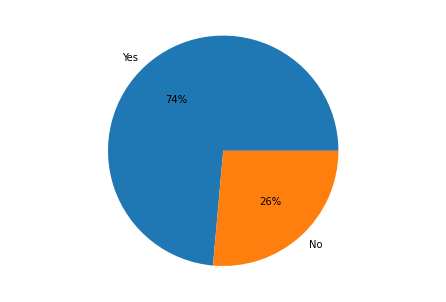

In [4]:
#Memvisualisasikan presentase churn
# melihat visualisasi data secara univariat terkait presentase data churn dari pelanggan.
# fungsi value_counts() untuk menghitung banyaknya unik dari sebuah kolom, pie() untuk membuat pie chart
from matplotlib import pyplot as plt
import numpy as np
#Your codes here
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

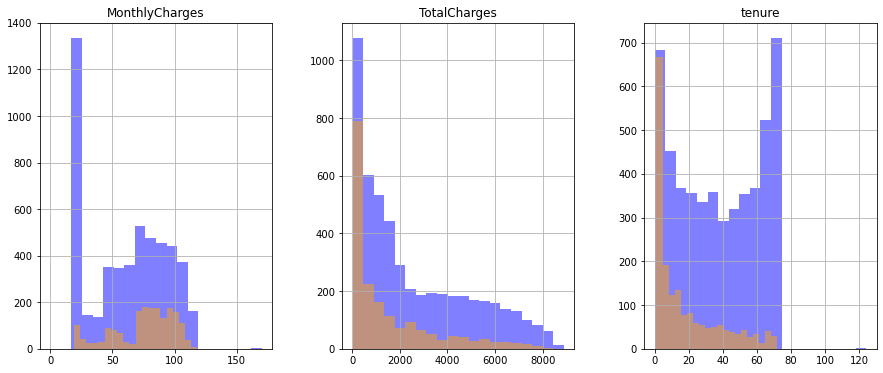

In [5]:
#Exploratory Data Analysis (EDA) Variabel Numerik
#memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

from matplotlib import pyplot as plt
import numpy as np
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

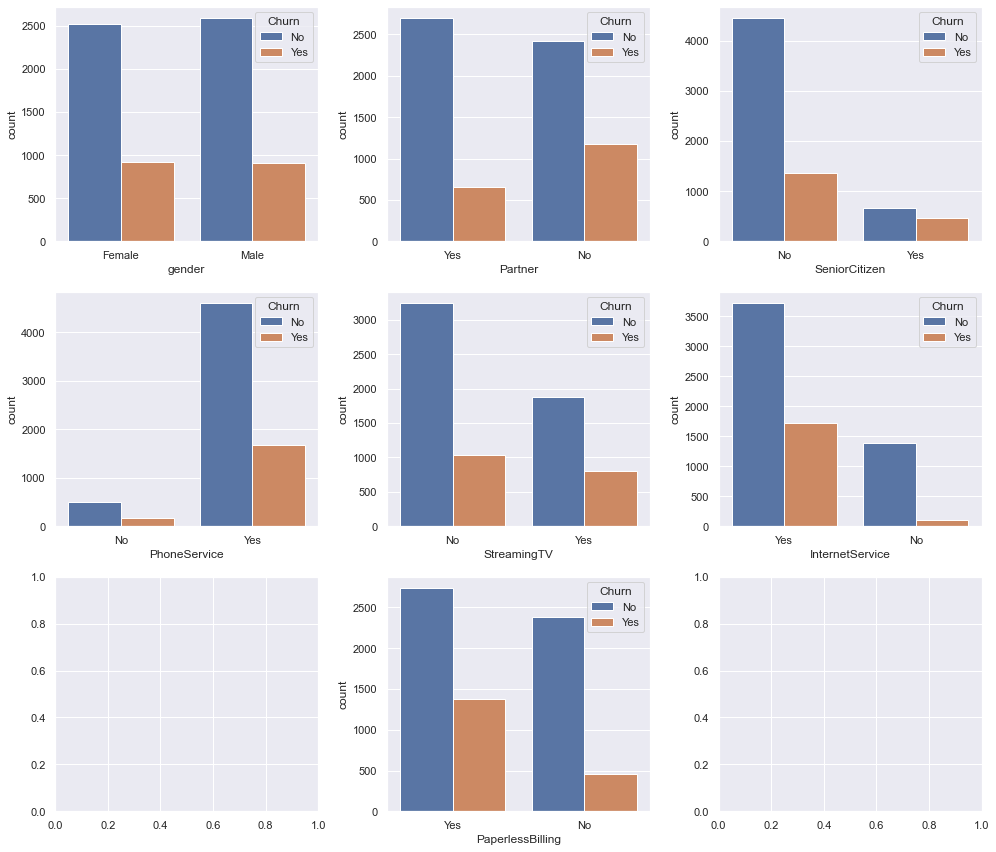

In [6]:
#Exploratory Data Analysis (EDA) Variabel Kategorik
#pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [7]:
#Menghapus Unnecessary Columns dari data
#mengapus kolom yang tidak akan diikutsertakan dalam pemodelan, kemudian simpan dengan nama cleaned_df. 
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
print(cleaned_df.head())

   gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0  Female            No     Yes       1           No          No   
1    Male            No     Yes      60          Yes          No   
2    Male            No      No       5          Yes         Yes   
3  Female            No     Yes      72          Yes         Yes   
4  Female            No     Yes      56          Yes         Yes   

  InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0             Yes              Yes           29.85         29.85    No  
1              No              Yes           20.50       1198.80    No  
2             Yes               No          104.10        541.90   Yes  
3             Yes              Yes          115.50       8312.75    No  
4             Yes               No           81.25       4620.40    No  


In [8]:
#Encoding Data
#Gunakan data dari hasil dan analisa sebelumnya cleaned_df, 
#untuk merubah value dari data yang masih berbentuk string untuk diubah ke dalam bentuk numeric menggunakan LabelEncoder()
from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
	if cleaned_df[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

<ipython-input-8-885127ec9a4c>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue


            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

In [9]:
#Splitting Dataset
#Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk dibagi datasetnya menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y). 
#Gunakan train_test_split() untuk membagi data tersebut. 
#Sertakan value_counts untuk mengecek apakah pembagian sudah sama proporsinya. 
#Simpan hasil spliting data menjadi x_train, y_train, x_test & y_test

from sklearn.model_selection import train_test_split
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64
